In [6]:
import tensorflow as tf
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


Text(0, 0.5, 'Sepal Width')

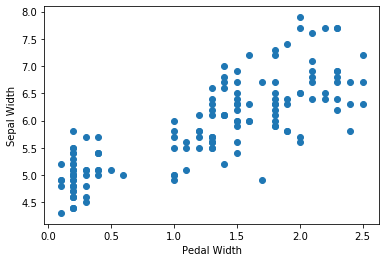

In [7]:
print(iris['feature_names'])

x = [x[3] for x in iris.data]

y = [x[0] for x in iris.data]

W = tf.Variable(np.random.randn()) # weight
B = tf.Variable(np.random.randn()) # bias

plt.scatter(x,y)
plt.xlabel("Pedal Width")
plt.ylabel("Sepal Width")


In [8]:
def grad(x, y, weights, biases):
    
  with tf.GradientTape() as tape:
    # loss_ = loss(x, y, weights, biases)
    prediction = weights * x + biases
    
    error = prediction - y
    
    squaredError = tf.square(error)
    
    loss_ = tf.reduce_mean(input_tensor=squaredError)
    
  return tape.gradient(loss_, [weights, biases]) # direction and value of the gradient of our loss w.r.t weight and bias


In [10]:
epochs = []
loss = []


# Find the Optimized weights
for i in range(400):
    deltaW, deltaB = grad(x, y, W, B) #
    change_W = deltaW * 0.01 
    change_B = deltaB * 0.01
    # print("change_W:{0}, change_B:{1}".format(change_W,change_B))
    W.assign_sub(change_W)
    B.assign_sub(change_B)
    
    # find Loss for New Weight and Bias values
    prediction = W * x + B
    error = prediction - y
    squared_error = tf.square(error)
    loss_ = tf.reduce_mean(input_tensor=squared_error)
    epochs.append(i)
    loss.append(loss_)
    print("Step:{0} and Loss:{1}".format(i,loss_))


Step:0 and Loss:41.056365966796875
Step:1 and Loss:36.987815856933594
Step:2 and Loss:33.36051940917969
Step:3 and Loss:30.126314163208008
Step:4 and Loss:27.242273330688477
Step:5 and Loss:24.67017364501953
Step:6 and Loss:22.375957489013672
Step:7 and Loss:20.329294204711914
Step:8 and Loss:18.50316619873047
Step:9 and Loss:16.87350082397461
Step:10 and Loss:15.418864250183105
Step:11 and Loss:14.120156288146973
Step:12 and Loss:12.960369110107422
Step:13 and Loss:11.924347877502441
Step:14 and Loss:10.998600006103516
Step:15 and Loss:10.171097755432129
Step:16 and Loss:9.431134223937988
Step:17 and Loss:8.76916790008545
Step:18 and Loss:8.176702499389648
Step:19 and Loss:7.646165370941162
Step:20 and Loss:7.170819282531738
Step:21 and Loss:6.744653224945068
Step:22 and Loss:6.36231803894043
Step:23 and Loss:6.019049167633057
Step:24 and Loss:5.710597991943359
Step:25 and Loss:5.43318510055542
Step:26 and Loss:5.183439254760742
Step:27 and Loss:4.958361625671387
Step:28 and Loss:4.75

Step:309 and Loss:0.5303616523742676
Step:310 and Loss:0.5278618931770325
Step:311 and Loss:0.525382399559021
Step:312 and Loss:0.5229234099388123
Step:313 and Loss:0.5204846858978271
Step:314 and Loss:0.5180656909942627
Step:315 and Loss:0.5156667828559875
Step:316 and Loss:0.513287365436554
Step:317 and Loss:0.5109274387359619
Step:318 and Loss:0.5085870027542114
Step:319 and Loss:0.5062658786773682
Step:320 and Loss:0.5039634108543396
Step:321 and Loss:0.5016800761222839
Step:322 and Loss:0.4994152784347534
Step:323 and Loss:0.4971691966056824
Step:324 and Loss:0.4949416220188141
Step:325 and Loss:0.49273204803466797
Step:326 and Loss:0.4905407130718231
Step:327 and Loss:0.4883671700954437
Step:328 and Loss:0.4862118065357208
Step:329 and Loss:0.4840739965438843
Step:330 and Loss:0.48195353150367737
Step:331 and Loss:0.47985056042671204
Step:332 and Loss:0.47776490449905396
Step:333 and Loss:0.47569626569747925
Step:334 and Loss:0.4736444652080536
Step:335 and Loss:0.471609652042388

Text(0, 0.5, 'Loss')

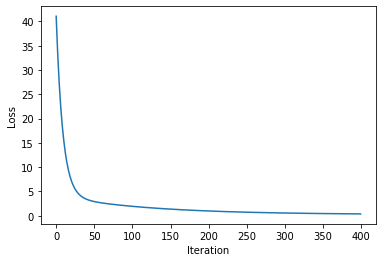

In [13]:
# Plot the Loss along with Iteration

plt.plot(epochs,loss)
plt.xlabel("Iteration")
plt.ylabel("Loss")

Text(0, 0.5, 'Sepal Length')

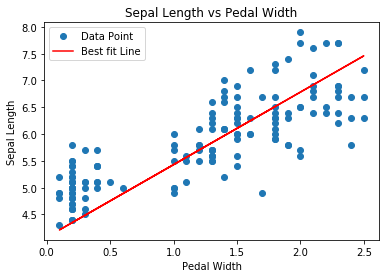

In [14]:
best_fit = list()

# Calculate the Prediction for the Optimized weights

for i in x:
    best_fit.append((W * i) + B)

# Plot the data points along with Best Line
plt.plot(x,y,'o',label = 'Data Point')
plt.plot(x,best_fit,'r-',label = 'Best fit Line')
plt.legend(loc='upper left')
plt.title('Sepal Length vs Pedal Width')
plt.xlabel('Pedal Width')
plt.ylabel('Sepal Length')
